# EDA

## Librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade ipykernel
!pip install demoji
!pip install lime
!pip install pyLDAvis
!pip install stop_words
!pip install gensim
!pip install wordcloud

     |████████████████████████████████| 130 kB 4.2 MB/s 
     |████████████████████████████████| 793 kB 40.5 MB/s 
     |████████████████████████████████| 380 kB 58.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requ

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle

import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.cm as cm

import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud
import string
import unicodedata
from stop_words import get_stop_words
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Preprocesado

In [ ]:
Bitcoin = pd.read_csv("./Bitcoin_tweets.csv",sep=',')

C:\Users\HP\AppData\Local\Temp\ipykernel_18904\4117717819.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Bitcoin = pd.read_csv("./Bitcoin_tweets.csv",sep=',')


In [ ]:
Bitcoin.head(5)


user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   
2           128.0          332             924         False   
3           625.0          129              14         False   
4          1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                        NaN      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

In [ ]:
#Eliminamos las filas donde hay Nas en la columna de text
Bitcoin = Bitcoin.dropna(subset=["text"])

In [ ]:
#Nos quedamos con la columna text
#datatext=Bitcoin[["text"]]
#datatext.head(5)

text
0  Blue Ridge Bank shares halted by NYSE after #b...
1  😎 Today, that's this #Thursday, we will do a "...
2  Guys evening, I have read this article about B...
3  $BTC A big chance in a billion! Price: \487264...
4  This network is secured by 9 508 nodes as of t...

In [ ]:
#Guardamos
Bitcoin.to_csv("BitClean.csv", index = False)

In [ ]:
Bitcoin = pd.read_csv("./BitClean.csv",sep=',')

C:\Users\HP\AppData\Local\Temp\ipykernel_18904\1416201971.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Bitcoin = pd.read_csv("./BitClean.csv",sep=',')


In [ ]:
#Transformamos emojis a texto y el resultado lo mostramos en una nueva columna llamada tweet
import demoji 

Bitcoin["tweet"]=Bitcoin["text"].apply(lambda x: demoji.replace_with_desc(x,","))
print(datatext.tail(10))

In [ ]:
#Guardamos con la conversión de emojis a texto
Bitcoin.to_csv("Bitemoji.csv", index=False)

In [ ]:
Bitemoji = pd.read_csv("./Bitemoji.csv",sep=',')

In [ ]:
Bitemoji.head()

tweet
0  Blue Ridge Bank shares halted by NYSE after #b...
1  ,smiling face with sunglasses, Today, that's t...
2  Guys evening, I have read this article about B...
3  $BTC A big chance in a billion! Price: \487264...
4  This network is secured by 9 508 nodes as of t...

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Añadimos nuevos stopwords a la lista porque son palabras que tienen mucha frecuencia de uso pero no aportan valor al cálculo del sentimiento 
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['bitcoin','btc','crypto','cryptocurrency','eth','https']
stopwords.extend(newStopWords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text):
    '''Función que remueve caracteres indeseados, stopwords y da formato al texto'''
    
    # Se para el texto a minúsculas
    text = text.lower()
    
    # Se da formato y se remueven los caracteres indeseados
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Se reemplazan las contracciones y se eliminan las stopwords
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions and word not in stopwords:
            new_text.append(contractions[word])
        if word not in contractions and word not in stopwords:
            new_text.append(word)
    text = " ".join(new_text)
    
    
    return text

In [ ]:
#Aplicamos función anterior para terminar de limpiar el texto
Bitemoji["clean"]=Bitemoji["tweet"].apply(lambda x: clean_text(x))
print(Bitemoji.tail(10))

                                                     tweet  \
2339104  #cryptocurrency with the most valuable #Cantor...   
2339105  Terra price analysis: LUNA rejected at $60, wh...   
2339106  Top 10 #Cryptocurrency Live Prices: \n(03:30 P...   
2339107  New post (Bitcoin Fundraising For Ottawa Truck...   
2339108  For the guys who follow the thread, it finishe...   
2339109  https://t.co/q3XA8T0O2s continues to add almos...   
2339110  The largest cross-border arbitrage seen by @Cr...   
2339111  The largest exchange premiums &amp; discounts ...   
2339112  #Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...   
2339113  #BTC Bullish Breakout on the 4 Hr RSI. I think...   

                                                     clean  
2339104  valuable cantor score today 1 comp cs 8 89 2 s...  
2339105  terra price analysis luna rejected 60 headed t...  
2339106  top 10 live prices 03 30 pm feb 14 2022 42154 ...  
2339107  new post fundraising ottawa truckers freedom c...  
2339108  guy

## Aplicación VADER para el análisis del sentimiento

In [ ]:
Bitemoji = pd.read_csv("./BitemojiClean.csv",sep=',')

C:\Users\HP\AppData\Local\Temp\ipykernel_18904\2050742532.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Bitemoji = pd.read_csv("./BitemojiClean.csv",sep=',')


In [ ]:
Bitemoji['scores'] = Bitemoji["clean"].apply(lambda tweet: sid.polarity_scores(tweet))

Bitemoji.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   
2           128.0          332             924         False   
3           625.0          129              14         False   
4          1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  \
0                                ['bitcoin']      Twitter Web App      False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False   
2                                        NaN      Twitter Web App      False   
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False   
4                                    ['BTC']      Twitter Web App      False   

                                               tweet  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  ,smiling face with sunglasses, Today, that's t...   
2  Guys evening, I have read this article about B...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   

                                               clean  \
0  blue ridge bank shares halted nyse atm announc...   
1  smiling face sunglasses today thursday clapper...   
2         guys evening read article would like share   
3  big chance billion price \4872644 0 2021 02 11...   
4  network secured 9 508 nodes today soon biggest...   

                                              scores  
0  {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...  
1  {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...  
2  {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'comp...  
3  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...  
4  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...

In [ ]:
Bitemoji['compound']  = Bitemoji['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
Bitemoji['sentiment_type']=''
Bitemoji.loc[Bitemoji.compound>0,'sentiment_type']='POSITIVE'
Bitemoji.loc[Bitemoji.compound==0,'sentiment_type']='NEUTRAL'
Bitemoji.loc[Bitemoji.compound<0,'sentiment_type']='NEGATIVE'

In [ ]:
Bitemoji.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   
2           128.0          332             924         False   
3           625.0          129              14         False   
4          1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  \
0                                ['bitcoin']      Twitter Web App      False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False   
2                                        NaN      Twitter Web App      False   
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False   
4                                    ['BTC']      Twitter Web App      False   

                                               tweet  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  ,smiling face with sunglasses, Today, that's t...   
2  Guys evening, I have read this article about B...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   

                                               clean  \
0  blue ridge bank shares halted nyse atm announc...   
1  smiling face sunglasses today thursday clapper...   
2         guys evening read article would like share   
3  big chance billion price \4872644 0 2021 02 11...   
4  network secured 9 508 nodes today soon biggest...   

                                              scores  compound sentiment_type  
0  {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...    0.2960       POSITIVE  
1  {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...    0.8225       POSITIVE  
2  {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'comp...    0.5719       POSITIVE  
3  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...    0.2500       POSITIVE  
4  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...    0.4019       POSITIVE

## Distribución del sentimiento

In [ ]:
Bitemoji['sentiment_type'].value_counts()

POSITIVE    1309519
NEUTRAL      655619
NEGATIVE     359618
Name: sentiment_type, dtype: int64

<AxesSubplot:title={'center':'sentiment analysis'}>

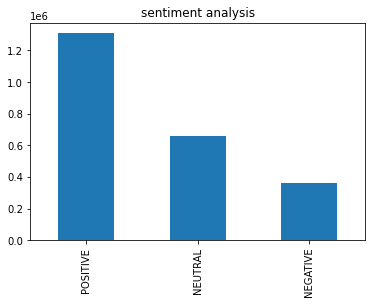

In [ ]:
Bitemoji.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

Se observa un dataset desbalanceado, vemos como el mayor peso se concentra en tweets con sentimiento positivo.

### Carga de datos para continuar con el análisis

In [ ]:
%mkdir /content/batch

mkdir: cannot create directory ‘/content/batch’: File exists


In [ ]:
import os

# Set the working directory to the sample code directory
%cd /content/batch

WORK_DIR = os.getcwd()

/content/batch


In [ ]:
#! mkdir ./data && unzip /content/drive/MyDrive/Proyecto_final/BitVader.zip -d /content/batch/data

mkdir: cannot create directory ‘./data’: File exists


In [ ]:
!unzip /content/drive/MyDrive/Proyecto_final/BitVader.zip -d /content/batch

Archive:  /content/drive/MyDrive/Proyecto_final/BitVader.zip
  inflating: /content/batch/BitVader.csv  


In [ ]:
BitVader = pd.read_csv("/content/batch/BitVader.csv",sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  for cell in nb.cells:


In [ ]:
BitVader.to_json('/content/drive/MyDrive/Proyecto_final/Bitcoin_tweets_Vader.json',orient = "records",lines = True)

In [ ]:
data = BitVader.copy()

## Cardinalidad

Para el análisis exploratorio, además se decide eliminar aquellos caracteres numéricos y no tener en cuenta las palabras de menos de 3 letras. Los resultados tras estos cambios son más interesantes y reducimos coste computacional.

In [ ]:
import re
def clean_text_less3words(text):
    
    
    # Se para el texto a minúsculas
    text = re.sub(r'\b\w{1,3}\b', '', text)
    return text
    
    # Se da formato y se remueven los caracteres indeseados


In [ ]:
def clean_numbers(text):
    
    
    # Se para el texto a minúsculas
    text = re.sub(r'[0-9]', '', text)
    return text

In [ ]:
 data['clean'] = data['clean'].apply(lambda x: clean_text_less3words(x))
 data['clean'] = data['clean'].apply(lambda x: clean_numbers(x))

In [ ]:
tweet = []
for text in data['clean']:
    tweet.append(text) 

In [ ]:
tweet[:10]

['blue ridge bank shares halted nyse atm announcement',
 'smiling face sunglasses today thursday clapper board take 2 friend leowandersleb wallet security expe…',
 'guys evening read article would like share',
 'big chance billion price \\4872644 0 2021 02 11 08 51 fx',
 'network secured 9 508 nodes today soon biggest bears recognise big fail…',
 'chart increasing yen trade binance pushpin enjoy cashback 10 trading fee pushpin sign link backhand index pointing right',
 'lt fire man gt',
 'counterclockwise arrows button prices update eur 1 hour 37082 1 € 0 51 1441 59 € 0 21 xrp 0 42 € …',
 'ethereum cryptotrading rsr know told guys target 0 060 know we…',
 'tesla’s investment revolutionary firms may yet jpmorgan…']

In [ ]:
def words(text): 
  return re.findall(r"([a-z']+)", text.lower())

In [ ]:
text = ' '.join(list(filter(None, tweet)))
text = text.replace("\\","")
list_words = words(text)
words = Counter(words(text))

In [ ]:
#Vemos una dataframe con las palabras y el número de veces que se repiten ( tenemos 174114 palabras distintas)
counted_df = pd.DataFrame(words.items(), columns=['word', 'count']).sort_values('count', ascending=False).reset_index(drop=True) 
counted_df.head()
counted_df.shape

(542331, 2)

In [ ]:
counted_df[:30].plot.barh(x='word', y='count',figsize=(10,10))
plt.show()

Vemos que la palabra más repetida es product, que si sumamos a la palabra products aparece, con diferencia, la que más veces. "Product" parece un término genérico y tal vez no sea interesante para el análisis.

## N-gramas más frecuentes

In [ ]:
#bigramas

In [ ]:
bigrams_ = list(ngrams(list_words, 2))

In [ ]:
bg_freq = FreqDist(bigrams_)

In [ ]:
bg_freq.most_common(10)

[(('rocket', 'rocket'), 163965),
 (('check', 'mark'), 71116),
 (('index', 'pointing'), 69549),
 (('backhand', 'index'), 68109),
 (('mark', 'button'), 66281),
 (('police', 'light'), 61503),
 (('smiling', 'face'), 58706),
 (('triangle', 'pointed'), 56663),
 (('fire', 'fire'), 56171),
 (('good', 'project'), 47602)]

In [ ]:
#Trigramas

In [ ]:
trigrams_ = list(ngrams(list_words, 3))

In [ ]:
tg_freq = FreqDist(trigrams_)

In [ ]:
tg_freq.most_common(20)

[(('rocket', 'rocket', 'rocket'), 93314),
 (('backhand', 'index', 'pointing'), 68032),
 (('check', 'mark', 'button'), 66158),
 (('triangle', 'pointed', 'triangle'), 36351),
 (('pointed', 'triangle', 'pointed'), 36350),
 (('airdrop', 'airdrops', 'airdropinspector'), 33695),
 (('fire', 'fire', 'fire'), 28254),
 (('index', 'pointing', 'right'), 27388),
 (('light', 'skin', 'tone'), 25212),
 (('smiling', 'face', 'heart'), 24339),
 (('face', 'heart', 'eyes'), 24203),
 (('money', 'mouth', 'face'), 22286),
 (('police', 'light', 'whale'), 21795),
 (('police', 'light', 'police'), 17231),
 (('light', 'police', 'light'), 17230),
 (('project', 'better', 'future'), 15991),
 (('hopefully', 'project', 'better'), 15951),
 (('thumbs', 'distribution', 'date'), 15411),
 (('stakes', 'stakes', 'invite'), 15396),
 (('referral', 'stakes', 'stakes'), 15390)]

Examinando los resultados, podemos ver que parte de los bigramas/trigramas parecen traducciones de los emojis. Es por tanto, que dichos emojis se utilizan mucho en los tweets. Un ejemplo puede ser "face heart eyes" cuya tradución es el emoji con corazones en los ojos, otro ejemplo es "fire fire fire", que es la traducción de tres emojis con el símbolo del fuego. 
Esto nos indica que deberemos ser cautos con el uso de los emojis por si condicionan el modelo, y valorar su eliminación.

## Nube de palabras

In [ ]:
def plot_word_cloud(text,n):
    wordcloud = WordCloud(max_font_size=50, max_words=n, background_color="white",collocations=False).generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
words_clean = [word for word in list_words if not any(stop in word for stop in STOP_WORDS)]

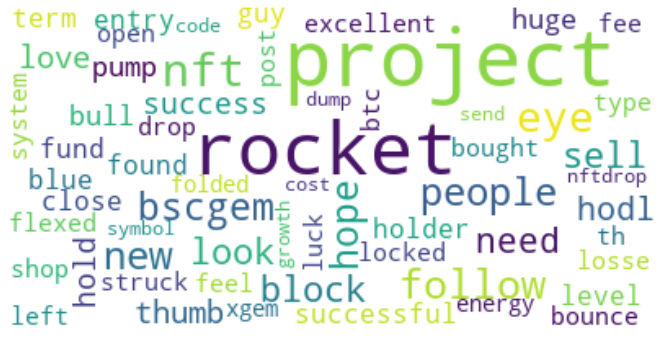

In [ ]:
plot_word_cloud(words_clean,60)

Para ver si existe diferencia en las palabras más usadas en los tweets positivos y negativos, se llevará a cabo un análisis para cada uno de estos sentimientos.

Nube de opiniones positivas

In [ ]:
def words(text): 
  return re.findall(r"([a-z']+)", text.lower())

In [ ]:
tweet_positivas = []
for text in data['clean'].loc[data['sentiment_type']=='POSITIVE']:
    tweet_positivas.append(text) 

In [ ]:
text_positivo = ' '.join(list(filter(None, tweet_positivas)))
list_words_positivas = words(text_positivo)

tcmalloc: large alloc 2033745920 bytes == 0x55cef816e000 @  0x7fc190e521e7 0x55cdf1a49f88 0x55cdf1a74a08 0x55cdf1a17281 0x55cdf1b09b3d 0x55cdf1a8b458 0x55cdf1a189da 0x55cdf1a86eae 0x55cdf1a8602f 0x55cdf1a85d43 0x55cdf1a841b0 0x55cdf1a17229 0x55cdf1a17120 0x55cdf1a8af33 0x55cdf1b0baf5 0x55cdf1a881bd 0x55cdf1b0baf5 0x55cdf1a881bd 0x55cdf1b0baf5 0x55cdf1a171cd 0x55cdf1b09b3d 0x55cdf1a8b458 0x55cdf1a189da 0x55cdf1a86eae 0x55cdf1a189da 0x55cdf1a87108 0x55cdf1a8602f 0x55cdf1a1936c 0x55cdf1a19571 0x55cdf1a88633 0x55cdf1a861c0


In [ ]:
words_clean_positivas = [word for word in list_words_positivas if not any(stop in word for stop in STOP_WORDS)]

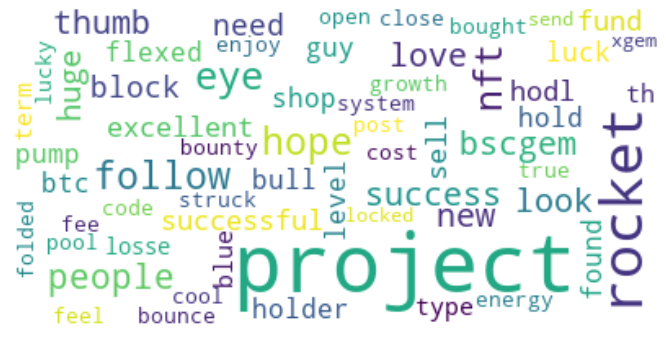

In [ ]:
plot_word_cloud(words_clean_positivas,60)

Podemos observar que en la nube de palabras de tweets positivos aparecen palabras como excellent, lucky, cool, energy, love, growth, success,.. que tienen una connotación positiva.

Nube de opiniones negativas

In [ ]:
tweet_negativas = []
for text in data['clean'].loc[data['sentiment_type']=='NEGATIVE']:
    tweet_negativas.append(text) 

In [ ]:
text_negativo = ' '.join(list(filter(None, tweet_negativas)))
list_words_negativas = words(text_negativo )

In [ ]:
words_clean_negativas  = [word for word in list_words_negativas if not any(stop in word for stop in STOP_WORDS)]

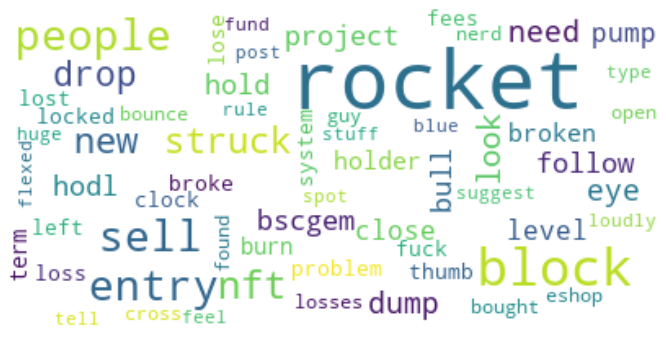

In [ ]:
plot_word_cloud(words_clean_negativas ,60)

En la nube negativa,aparecen palabras como losses,fuck , struck sell, problem con connotación negativa.

## Visualización word2vec

Visualización en 2 dimensiones de algunos word embeddings con word2Vec

In [ ]:
sg_params = {
    'sg': 1,
    'size': 300,
    'min_count': 5,
    'window': 5,
    'hs': 0,
    'negative': 20,
    'workers': 4
}

cbow_params = {
    'sg': 0,
    'size': 300,
    'min_count': 5,
    'window': 5,
    'hs': 0,
    'negative': 20,
    'workers': 4
}

In [ ]:
corpus = []
for text in data['clean']:
    corpus.append(re.findall(r"([a-z']+)", text.lower())) 

In [ ]:
# Skip Gram
w2v_sg = Word2Vec(**sg_params)

# CBOW
w2v_cbow = Word2Vec(**cbow_params)

In [ ]:
# Skip Gram
w2v_sg.build_vocab(corpus)

# CBOW
w2v_cbow.build_vocab(corpus)

In [ ]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_sg.wv.vocab)))

Vocabulario compuesto por 114110 palabras


In [ ]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_cbow.wv.vocab)))

Vocabulario compuesto por 114110 palabras


In [ ]:
class EpochLogger(CallbackAny2Vec):
      '''Callback to log information about training'''
    
      def __init__(self):
           self.epoch = 0
   
      def on_epoch_begin(self, model):
             print("Epoch #{} start".format(self.epoch))
    
      def on_epoch_end(self, model):
             print("Epoch #{} end".format(self.epoch))
             self.epoch += 1

In [ ]:
# Skip Gram
epoch_logger = EpochLogger()
w2v_sg.train(sentences=corpus, total_examples=w2v_sg.corpus_count, epochs=8, callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end
Epoch #5 start
Epoch #5 end
Epoch #6 start
Epoch #6 end
Epoch #7 start
Epoch #7 end


(236491108, 254354544)

In [ ]:
w2v_sg.save('/content/drive/MyDrive/Proyecto_final/w2v_sg_sentiment.pkl')

In [ ]:
# CBOW
epoch_logger = EpochLogger()
w2v_cbow.train(sentences=corpus, total_examples=w2v_cbow.corpus_count, epochs=8,callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end
Epoch #5 start
Epoch #5 end
Epoch #6 start
Epoch #6 end
Epoch #7 start
Epoch #7 end


(236494575, 254354544)

In [ ]:
w2v_cbow.save('/content/drive/MyDrive/Proyecto_final/w2v_cbow_sentiment.pkl')

In [ ]:
def print_sim_words(word, model1, model2):
    query = "Most similar to {}".format(word) 
    print(query)
    print("-"*len(query))
    for (sim1, sim2) in zip(model1.wv.most_similar(word), model2.wv.most_similar(word)):
        print("{}:{}{:.3f}{}{}:{}{:.3f}".format(sim1[0],
                                               " "*(20-len(sim1[0])), 
                                               sim1[1], 
                                               " "*10, 
                                               sim2[0],
                                               " "*(20-len(sim2[0])),
                                               sim2[1]))
    print("\n")

In [ ]:
print_sim_words('corruption', w2v_cbow, w2v_sg)
print_sim_words('energy', w2v_cbow, w2v_sg) 
print_sim_words('people', w2v_cbow, w2v_sg)
print_sim_words('country', w2v_cbow, w2v_sg)

Most similar to corruption
--------------------------
tyranny:             0.725          corrupt:             0.578
tyrannical:          0.687          coersion:            0.572
corrupt:             0.682          injustices:          0.568
defund:              0.669          imperialist:         0.565
authoritarian:       0.660          checkmates:          0.563
communism:           0.658          oppressors:          0.563
capitalism:          0.656          spigot:              0.558
coercion:            0.654          defunds:             0.557
bureaucrats:         0.653          upended:             0.557
oppressive:          0.646          collectivist:        0.556


Most similar to energy
----------------------
electricity:         0.708          renewable:           0.768
renewables:          0.628          electricity:         0.666
wasteful:            0.618          flared:              0.661
fossil:              0.615          photovoltaic:        0.656
methane:        

Podemos ver como para cada uno de los casos hay un modelo que funciona mejor. Por ejemplo para la palabra corruption, el modelo que mejores resultados obteniene es cbow obteniendo de 0.725 para tyranny. Sin embargo, para energy ocurre lo contrario.

## Visualización embedings

In [ ]:
keys = ['goverment', 'people', 'country', 'energy']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [ ]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


In [ ]:
tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

Parece que energy se separa bastante del resto. Y aunque los otros tres grupos los diferenciamos con facilidad, no existe mucha separación entre ellos.